# 3. Faza - Strojove ucenie
## Bettina Pinkeova - 50%, Daniel Kavuliak - 50%


## Predspracovanie

<ul>
    <li>Funkcia na konvertovanie kategorickych atributov na numericke</li>
</ul>

In [1]:
def convert(df):
    for column in df.columns:
        if df[column].dtype == 'object' or df[column].dtype == 'bool':
            df[column] = df[column].astype('category')
            df[column] = df[column].cat.codes
            
    return df

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import my_preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.externals.six import StringIO
import pydotplus

%matplotlib inline

C:\Users\Danie\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [3]:
personal_train = pd.read_csv('personal_train.csv')
other_train = pd.read_csv('other_train.csv')

In [4]:
other_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3983 entries, 0 to 3982
Data columns (total 22 columns):
Unnamed: 0          3983 non-null int64
name                3983 non-null object
address             3983 non-null object
kurtosis_oxygen     3971 non-null float64
pregnant            3976 non-null object
education-num       3970 non-null float64
relationship        3970 non-null object
skewness_glucose    3976 non-null float64
mean_glucose        3969 non-null float64
std_oxygen          3971 non-null float64
capital-gain        3971 non-null float64
skewness_oxygen     3968 non-null float64
kurtosis_glucose    3963 non-null float64
personal_info       3962 non-null object
education           3968 non-null object
fnlwgt              3969 non-null float64
class               3970 non-null float64
std_glucose         3570 non-null float64
income              3968 non-null object
mean_oxygen         3967 non-null float64
hours-per-week      3969 non-null float64
capital-loss        

<ul>
    <li>Najprv si predspracujeme trenovaciie datasety personal_train a other_train</li>
    <li>Potom oba datasety spojime</li>
</ul>

In [5]:
my_merger = my_preprocessing.MyMerger()

my_tidy_personal = my_preprocessing.MyTidy()
my_imputer_personal = my_preprocessing.MyImputer()
my_normalizator_personal = my_preprocessing.MyNormalizator()

my_tidy_other = my_preprocessing.MyTidy()
my_imputer_other = my_preprocessing.MyImputer()
my_normalizator_other = my_preprocessing.MyNormalizator()

In [6]:
personal_train = my_tidy_personal.tidy_personal(personal_train.copy())
personal_train = my_imputer_personal.fit_transform(personal_train.copy())
personal_train = my_normalizator_personal.normalize(personal_train.copy())

other_train = my_tidy_other.tidy_other(other_train.copy())
other_train = my_imputer_other.fit_transform(other_train.copy())
other_train = my_normalizator_other.normalize(other_train.copy())

new_train = my_merger.merge(personal_train.copy(), other_train.copy())

C:\Users\Danie\Desktop\iau\projekt\my_preprocessing.py:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[column_name[i]][mask] = self.value[k]
C:\Users\Danie\Desktop\iau\projekt\my_preprocessing.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[column_name[i]][mask] = self.value[k]
C:\Users\Danie\Desktop\iau\projekt\my_preprocessing.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[column_name[i]][mask] = self.value[k]
C:\Users\Danie\Desktop\iau\projekt\my_preprocessi

<ul>
    <li>Zistili sme, ze pri linearnej regresii sme namiesto parametra df pouzili referenciu na dataset other_train</li>
    <li>Prepisali sme to na spravny tvar</li>
    <li>Ako vidime dataset je v spravnom tvare a v stlpcoch sa nenachdadzaju ziadne nulove hodnoty</li>
</ul>

In [7]:
new_train.head()

name  age      sex date_of_birth  kurtosis_oxygen  pregnant  \
0  Roscoe Bohannon   32   Female    1987-07-22         9.221405     False   
1     Ernest Kline   55     Male    1963-10-27         4.034847     False   
2  Harold Hendriks   62     Male    1957-10-05         8.257814     False   
3   Randy Baptiste   47     Male    1972-06-29         2.585330     False   
4  Anthony Colucci   52   Female    1967-08-15         2.878585     False   

   education-num   relationship  skewness_glucose  mean_glucose  ...  \
0            7.0      Own-child          1.092215    128.742188  ...   
1            7.0        Husband          2.143209     86.539062  ...   
2           13.0        Husband          1.075085    130.070312  ...   
3           12.0  Not-in-family          2.530467     68.789062  ...   
4           12.0           Wife          1.183175    103.398438  ...   

   capital-loss                       street            city  postal_code  \
0           0.0   7183 Osborne Ways Apt. 651     East Andrew     OH 53211   
1           0.0      391 Ball Road Suite 961  Flowersborough     IN 57550   
2           0.0          8702 Vincent Square   New Jerryfurt     CO 30614   
3           0.0        2751 Harris Crossroad     West Ashley     CA 30311   
4           0.0  904 Robert Cliffs Suite 186       West Kyle     CO 77139   

             job        country              status  employment   race  \
0  Other_service  United-States       Never-married     Private  White   
1  Other_service  United-States  Married-civ-spouse     Private  White   
2   Craft_repair  United-States  Married-civ-spouse     Private  White   
3          Sales  United-States       Never-married     Private  White   
4   Tech_support  United-States  Married-civ-spouse     Private  White   

   city_was_nan  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  

[5 rows x 31 columns]

In [8]:
new_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3933 entries, 0 to 3932
Data columns (total 31 columns):
name                3933 non-null object
age                 3933 non-null int64
sex                 3933 non-null object
date_of_birth       3933 non-null object
kurtosis_oxygen     3933 non-null float64
pregnant            3933 non-null bool
education-num       3933 non-null float64
relationship        3933 non-null object
skewness_glucose    3933 non-null float64
mean_glucose        3933 non-null float64
std_oxygen          3933 non-null float64
capital-gain        3933 non-null float64
skewness_oxygen     3933 non-null float64
kurtosis_glucose    3933 non-null float64
education           3933 non-null object
fnlwgt              3933 non-null float64
class               3933 non-null bool
std_glucose         3933 non-null float64
income              3933 non-null object
mean_oxygen         3933 non-null float64
hours-per-week      3933 non-null float64
capital-loss        3933 

In [9]:
personal_valid = pd.read_csv('personal_valid.csv')
other_valid = pd.read_csv('other_valid.csv')

<ul>
    <li>Zistili sme ze v niektorych stlpcoch su nulove hodnoty napriek tomu ze v train neboli a preto uz neignorujeme stlpce v ktorych neboli nulve hodnoty v traine</li>
    <li>Dataset je v spravnom tvare a taktiez neobsahuje nulove hodnoty</li>
</ul>

In [10]:
personal_valid = my_tidy_personal.tidy_personal(personal_valid.copy())
personal_valid = my_imputer_personal.transform(personal_valid.copy())
personal_valid = my_normalizator_personal.normalize(personal_valid.copy())

other_valid = my_tidy_other.tidy_other(other_valid.copy())
other_valid = my_imputer_other.transform(other_valid.copy())
other_valid = my_normalizator_other.normalize(other_valid.copy())

new_valid = my_merger.merge(personal_valid.copy(), other_valid.copy())

In [11]:
new_valid

name  age      sex date_of_birth  kurtosis_oxygen  \
0          Philip Miller   52     Male    1967-03-21         3.650992   
1           Mitch Wilson   47     Male    1972-09-16         6.124397   
2            James Olsen   58     Male    1961-08-20         9.076240   
3          Maurice Riley   51   Female    1967-12-13         9.299193   
4          Larry Stanley   62     Male    1957-04-14         8.472437   
5       Stanley Orndorff   50   Female    1969-10-08         0.939809   
6          Mark Bierlein   49     Male    1970-12-04        11.984702   
7         Matthew Spence   47     Male    1972-08-28        10.541330   
8        Willie Williams   37     Male    1981-11-03         6.230102   
9         Curtis Johnson   38     Male    1981-08-11        13.331889   
10         Adrian Strohm   43     Male    1975-12-22         7.011638   
11          Vernon Sagon   32   Female    1987-03-26         4.327291   
12           Todd Gilles   47     Male    1972-03-01         6.943094   
13        Joseph Spector   49     Male    1970-03-29         8.896720   
14    Kristopher Catrone   51     Male    1968-09-29         0.665616   
15            Lynn Quist   49   Female    1970-06-22        14.443795   
16          Eduardo Paci   42   Female    1977-02-22         3.979722   
17        Elvin Troutman   43     Male    1976-09-23         8.817627   
18          John Briscoe   58   Female    1961-07-03        12.116941   
19             John Cuff   29     Male    1990-06-23         3.614780   
20           John Pierce   76     Male    1943-02-16         1.814686   
21       Emanuel Jenkins   61     Male    1958-08-07         8.143903   
22            Paul Corey   39   Female    1979-11-03        13.364706   
23       Andrew Erickson   37     Male    1982-08-12         8.908758   
24           Alex Coates   52     Male    1967-06-18         7.638368   
25          Frankie Cook   52     Male    1967-07-13         9.665576   
26         James Oglesby   52   Female    1967-01-18        13.445474   
27            Terry Rock   34     Male    1985-03-05         3.774311   
28     Anthony Pisciotta   42     Male    1976-12-21         8.094686   
29           Eric Steuer   64     Male    1955-06-29        10.945448   
...                  ...  ...      ...           ...              ...   
1281        John Shirley   56     Male    1963-06-27         0.334481   
1282         James Baker   51     Male    1967-11-14        12.383707   
1283  Theodore Rodibaugh   56     Male    1963-03-02         0.005077   
1284       Teddy Alegria   54     Male    1965-07-03         7.400958   
1285        Eugene Smith   63   Female    1956-03-12         0.718282   
1286         Jason White   55     Male    1964-04-24        11.906242   
1287        Timothy Cook   48     Male    1971-04-21        15.063181   
1288         Sean Tenney   27   Female    1992-01-28        13.073273   
1289     Robert Sullivan   46     Male    1972-11-04        14.356182   
1290      Daniel Vasquez   34     Male    1985-01-16         4.957514   
1291        Matt Vazquez   64     Male    1955-02-22        10.213214   
1292      Douglas Threet   70   Female    1949-01-25         8.672894   
1293         John Quandt   38   Female    1981-10-18         3.028327   
1294        Thomas Brown   60     Male    1959-12-03         0.005077   
1295      Nathan Woodrow   29   Female    1989-12-26         8.355472   
1296      Harris Catalan   37     Male    1982-06-28         7.170143   
1297      Thomas Kelling   61     Male    1958-06-20         4.399807   
1298       Jack Staggers   47     Male    1972-03-02         6.197347   
1299        Timothy Borg   62     Male    1956-12-08         8.964510   
1300      Anthony Widell   53     Male    1966-04-17        12.724460   
1301       David Gentles   57     Male    1962-03-06         5.515590   
1302        Rolland Cale   41   Female    1977-12-08        10.206538   
1303        Bobby Farlow   48   Female    1971-03-16        10.132191   
1304 

In [12]:
new_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1311 entries, 0 to 1310
Data columns (total 31 columns):
name                1311 non-null object
age                 1311 non-null int64
sex                 1311 non-null object
date_of_birth       1311 non-null object
kurtosis_oxygen     1311 non-null float64
pregnant            1311 non-null bool
education-num       1311 non-null float64
relationship        1311 non-null object
skewness_glucose    1311 non-null float64
mean_glucose        1311 non-null float64
std_oxygen          1311 non-null float64
capital-gain        1311 non-null float64
skewness_oxygen     1311 non-null float64
kurtosis_glucose    1311 non-null float64
education           1311 non-null object
fnlwgt              1311 non-null float64
class               1311 non-null bool
std_glucose         1311 non-null float64
income              1311 non-null object
mean_oxygen         1311 non-null float64
hours-per-week      1311 non-null float64
capital-loss        1311 

## Manualne vytvorenie a vyhodnotenie rozhodovacich pravidiel pre klasifikaciu

C:\Users\Danie\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Danie\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


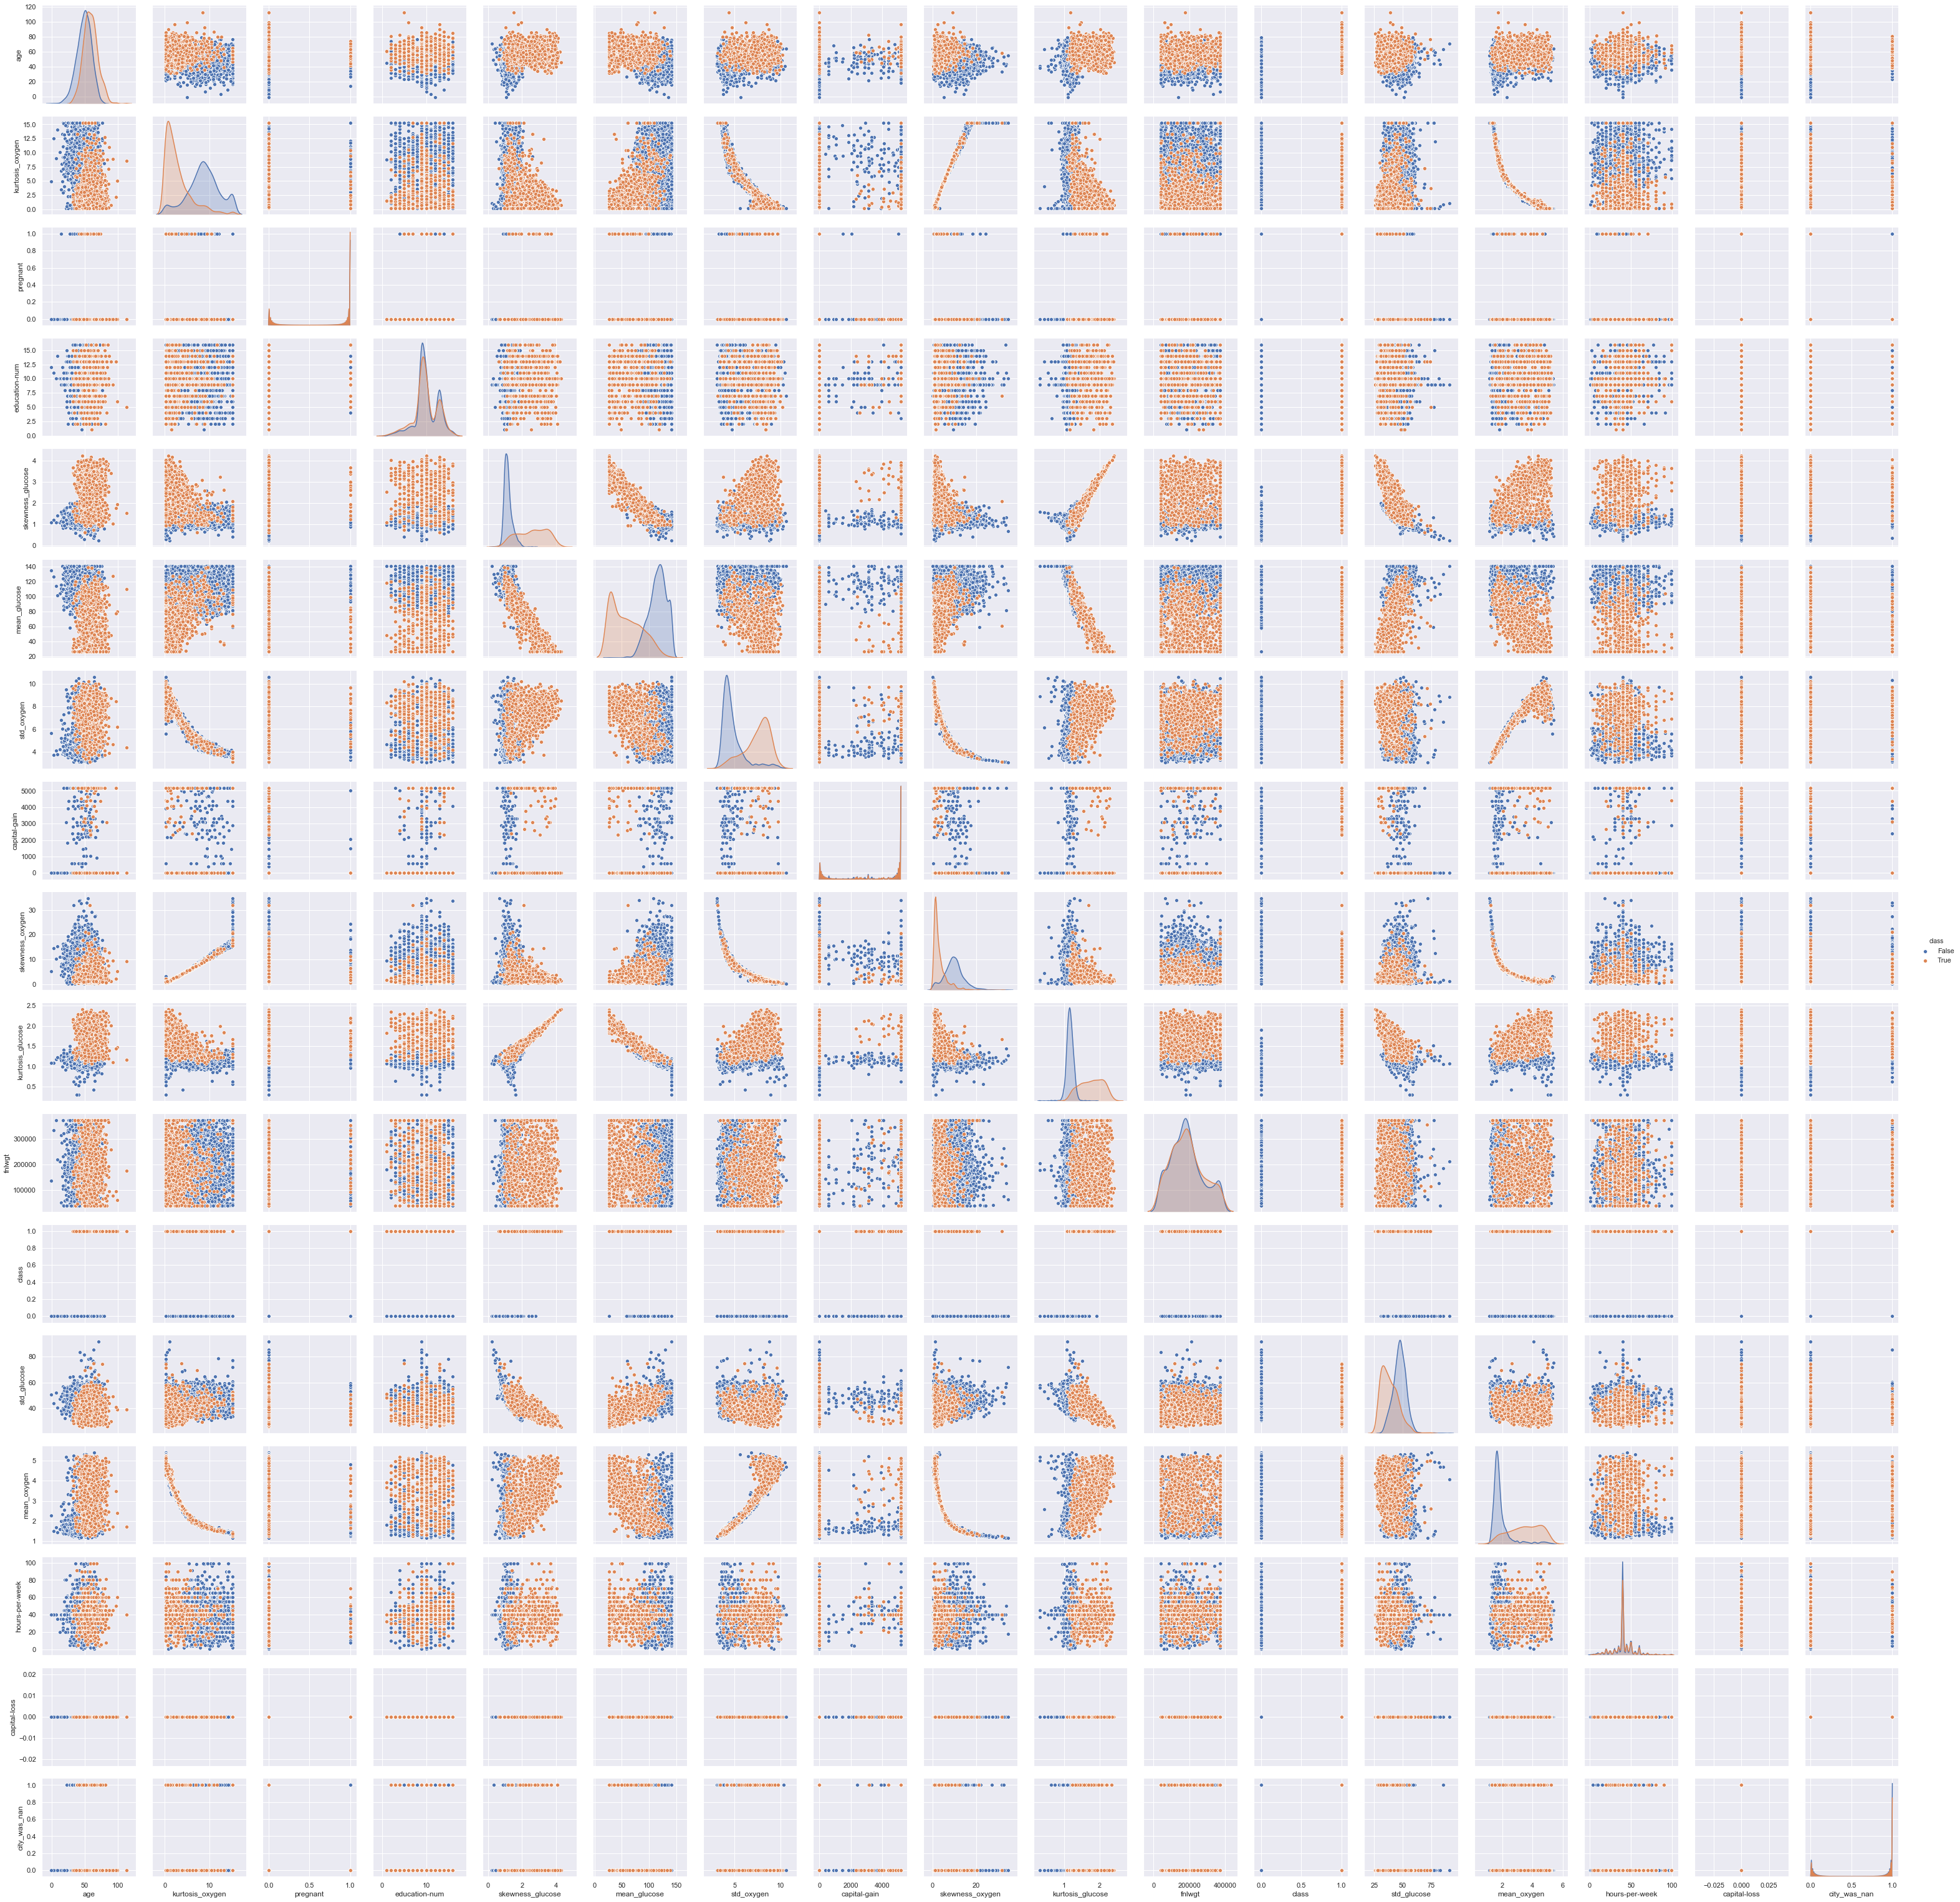

In [13]:
sns.pairplot(new_train, hue='class')

<ul>
    <li>Vidime, ze ludia ktori maju cukrovku maju nizsiu hodnotu kurtosis_oxygen (mensiu ako 4) </li>
</ul>

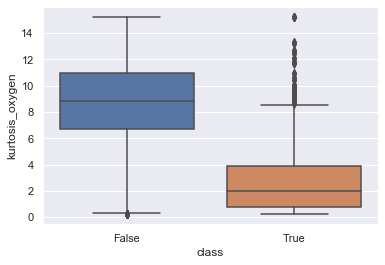

In [14]:
sns.boxplot(x=new_train['class'], y=new_train['kurtosis_oxygen'])

<ul>
    <li>Ludia s cukrovkou maju hodnotu skewness_glucose vacsiu ako 2 </li>
</ul>

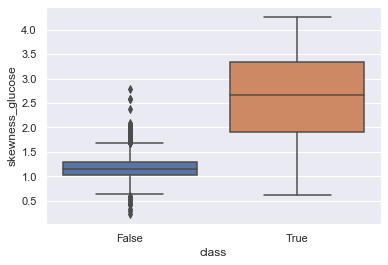

In [15]:
sns.boxplot(x=new_train['class'], y=new_train['skewness_glucose'])

<ul>
    <li>Cukrovkari maju hodnotu mean_glucose mensiu ako 80 </li>
</ul>

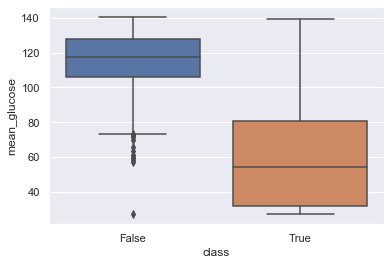

In [16]:
sns.boxplot(x=new_train['class'], y=new_train['mean_glucose'])

<ul>
    <li>Vidime, ze vacsina cukrovkarov ma hodnotu mean_oxygen vacsiu ako 3 a zaroven hodnotu kurtosis_oxygen mensiu ako 3 </li>
</ul>

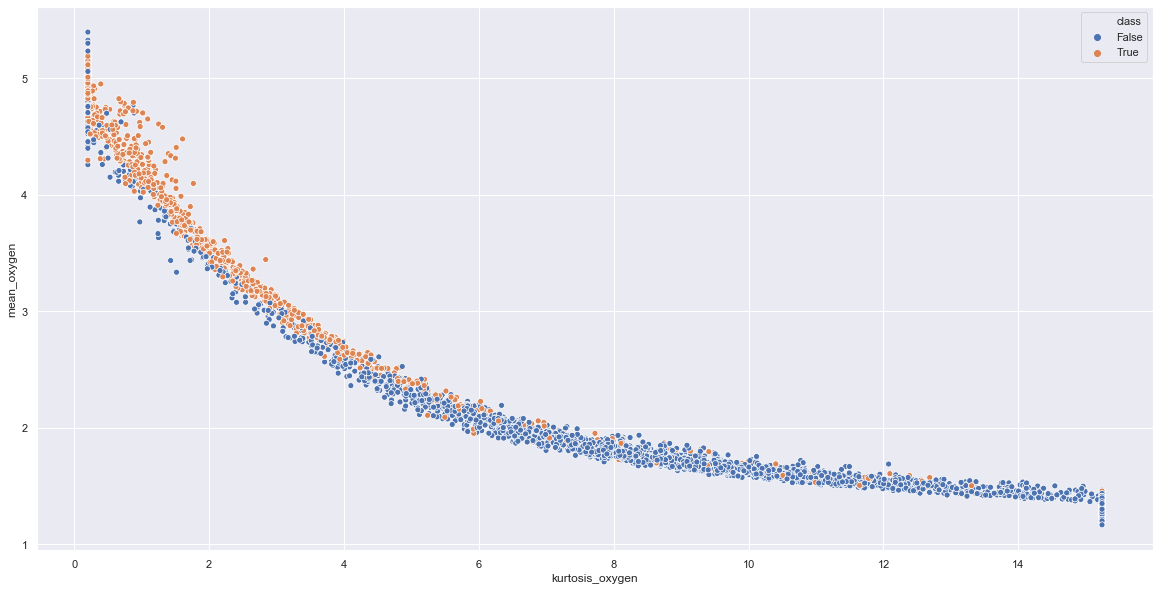

In [17]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x=new_train['kurtosis_oxygen'], y=new_train['mean_oxygen'], hue=new_train['class'])

<ul>
    <li>Ludia s cukrovkou maju hodnotu kurtosis_glucose  ako vacsiu 1,3 a zaroven hodnotu skewness_glucose vacsiu ak 2 </li>
</ul>

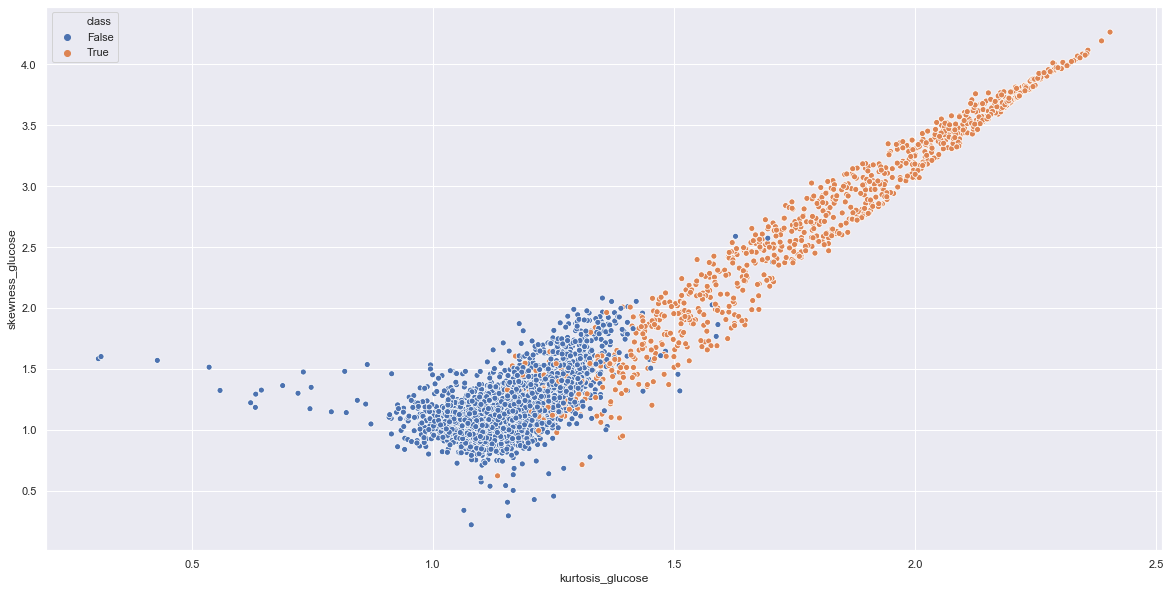

In [18]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x=new_train['kurtosis_glucose'], y=new_train['skewness_glucose'], hue=new_train['class'])

<ul>
    <li>Cukrovkari maju hodnotu skewness_glucose vacsiu ako 2 a zaroven hodnotu mean_glucose mensiu ako cca 75 </li>
</ul>

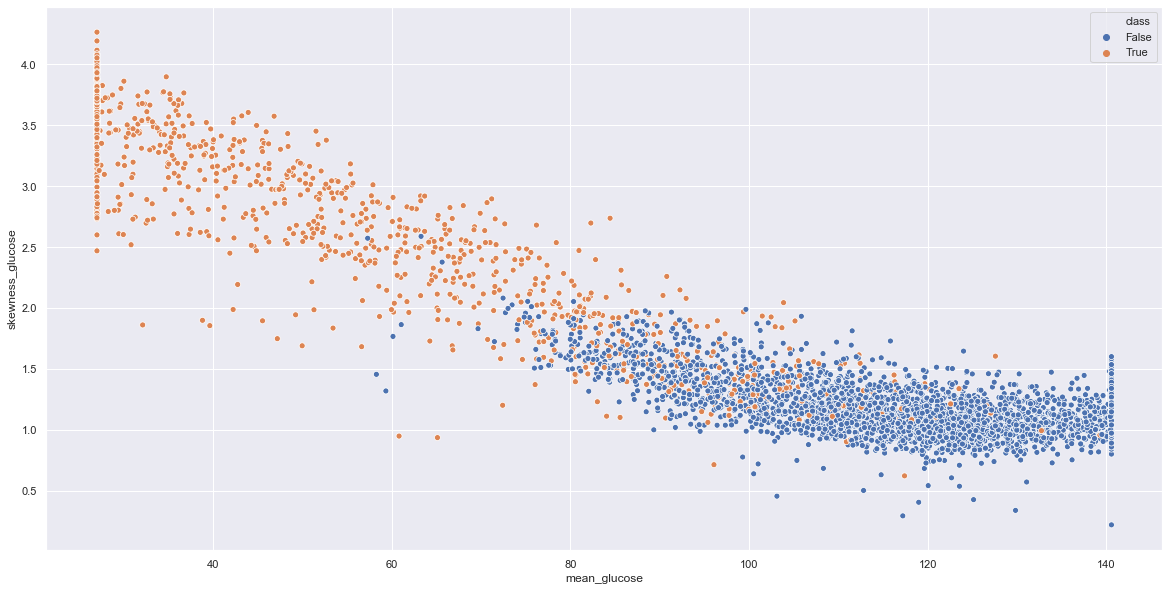

In [19]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x=new_train['mean_glucose'], y=new_train['skewness_glucose'], hue=new_train['class'])

<ul>
    <li>Tu oddelujeme label od ostatnych stlpcov aj v train aj vo valid </li>
</ul>

In [20]:
X_train = new_train[new_train.columns.difference(['class'])]
y_train = new_train['class']
X_test = new_valid[new_valid.columns.difference(['class'])]
y_test = new_valid['class']

In [21]:
predict = []
for i, j in new_valid.iterrows():
    if j['kurtosis_oxygen'] < 4.0:
        predict.append(1)
    else:
        predict.append(0)

### Vyhodnotenie rozhodvacich pravidiel na zaklade kurtosis_oxygen

In [22]:
print(classification_report(y_test, predict, digits=3))

              precision    recall  f1-score   support

       False      0.926     0.896     0.911       966
        True      0.734     0.800     0.766       345

    accuracy                          0.871      1311
   macro avg      0.830     0.848     0.838      1311
weighted avg      0.876     0.871     0.873      1311



<ul>
    <li>Hodnota accuracy je 87,1%, precision je 83,0%, recall je 84,8% a f-1 score je 83,8%</li>
</ul>

Text(0.5, 12.5, 'Predicted class')

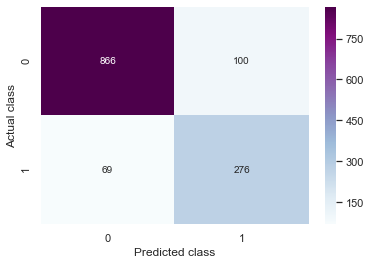

In [23]:
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt='d', cmap='BuPu')
plt.ylabel('Actual class')
plt.xlabel('Predicted class')

In [24]:
predict = []
for i, j in new_valid.iterrows():
    if j['skewness_glucose'] > 2.0:
        predict.append(1)
    else:
        predict.append(0)

### Vyhodnotenie rozhodovacich pravidiel na zaklade skewness_glucose

In [25]:
print(classification_report(y_test, predict, digits=3))

              precision    recall  f1-score   support

       False      0.920     0.991     0.954       966
        True      0.967     0.759     0.851       345

    accuracy                          0.930      1311
   macro avg      0.943     0.875     0.902      1311
weighted avg      0.932     0.930     0.927      1311



<ul>
    <li>Hodnota accuracy je 93,0%, precision 94,3%, recall 87,5% a f-1 score 90,2%</li>
</ul>

Text(0.5, 12.5, 'Predicted class')

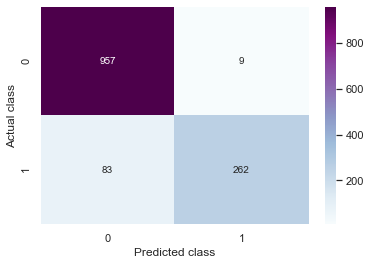

In [26]:
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt='d', cmap='BuPu')
plt.ylabel('Actual class')
plt.xlabel('Predicted class')

In [27]:
predict = []
for i, j in new_valid.iterrows():
    if j['mean_glucose'] < 80.0:
        predict.append(1)
    else:
        predict.append(0)

### Vyhodnotenie rozhodvacich pravidiel na zaklade mean_glucose

In [28]:
print(classification_report(y_test, predict, digits=3))

              precision    recall  f1-score   support

       False      0.928     0.973     0.950       966
        True      0.913     0.788     0.846       345

    accuracy                          0.924      1311
   macro avg      0.920     0.881     0.898      1311
weighted avg      0.924     0.924     0.923      1311



<ul>
    <li>Hodnota accuracy je 92,4%, precision je 92,0%, recall je 88,1% a f-1 score je 89,8%</li>
</ul>

Text(0.5, 12.5, 'Predicted class')

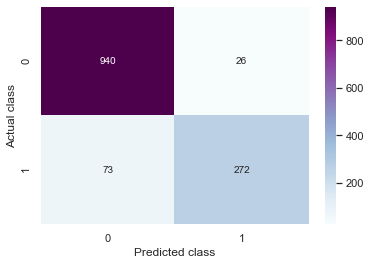

In [29]:
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt='d', cmap='BuPu')
plt.ylabel('Actual class')
plt.xlabel('Predicted class')

In [30]:
predict = []
for i, j in new_valid.iterrows():
    if j['kurtosis_oxygen'] < 3.0 and j['mean_oxygen'] > 3.0:
        predict.append(1)
    else:
        predict.append(0)

### Vyhodnotenie rozhodovacich pravidiel na zaklade mean_oxygen a kurtosis_oxygen

In [31]:
print(classification_report(y_test, predict, digits=3))

              precision    recall  f1-score   support

       False      0.889     0.924     0.906       966
        True      0.761     0.675     0.716       345

    accuracy                          0.859      1311
   macro avg      0.825     0.800     0.811      1311
weighted avg      0.855     0.859     0.856      1311



<ul>
    <li>Hodnota accuracy je 85,9%, precision je 82,5%, recall je 80,0%, f-1 je 81,1%</li>
</ul>

Text(0.5, 12.5, 'Predicted class')

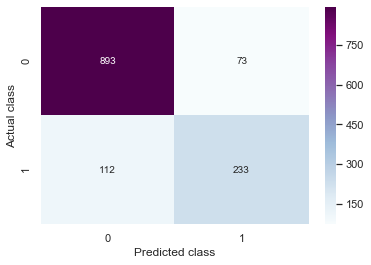

In [32]:
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt='d', cmap='BuPu')
plt.ylabel('Actual class')
plt.xlabel('Predicted class')

In [33]:
predict = []
for i, j in new_valid.iterrows():
    if j['kurtosis_glucose'] > 1.3 and j['skewness_glucose'] > 2.0:
        predict.append(1)
    else:
        predict.append(0)

### Vyhodnotenie rozhodovacich pravidiel na zaklade kurtosis_glucose a skewness_glucose

In [34]:
print(classification_report(y_test, predict, digits=3))

              precision    recall  f1-score   support

       False      0.920     0.991     0.954       966
        True      0.967     0.759     0.851       345

    accuracy                          0.930      1311
   macro avg      0.943     0.875     0.902      1311
weighted avg      0.932     0.930     0.927      1311



<ul>
    <li>Hodnota accuracy je 93%, precision je 94,3%, precision je 94,3%, recall je 87,5% a f-1 score 90,2%</li>
</ul>

Text(0.5, 12.5, 'Predicted class')

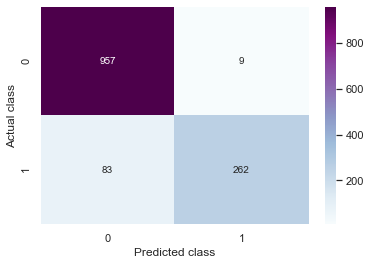

In [35]:
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt='d', cmap='BuPu')
plt.ylabel('Actual class')
plt.xlabel('Predicted class')

In [36]:
predict = []
for i, j in new_valid.iterrows():
    if j['skewness_glucose'] > 2.0 and j['mean_glucose'] < 75.0:
        predict.append(1)
    else:
        predict.append(0)

### Vyhodnotenie rozhodovacich pravidiel na zaklade skewness_glucose a mean_glucose

In [37]:
print(classification_report(y_test, predict, digits=3))

              precision    recall  f1-score   support

       False      0.902     0.995     0.946       966
        True      0.980     0.699     0.816       345

    accuracy                          0.917      1311
   macro avg      0.941     0.847     0.881      1311
weighted avg      0.923     0.917     0.912      1311



<ul>
    <li>Hdnota accuracy je 91,17%, precision je 94,1%, recall je 84,7% a f1-score je 88,1%.</li>
</ul>

Text(0.5, 12.5, 'Predicted class')

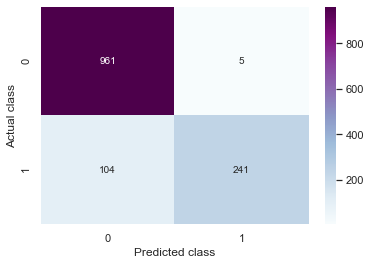

In [38]:
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt='d', cmap='BuPu')
plt.ylabel('Actual class')
plt.xlabel('Predicted class')

### Vyhodnotenie manualne vytvorenych pravidiel
<ul>
    <li>Pri pouziti len jedneho atributu bol najuspesnejsi atribut skewness_glucose s hodnotou Accuracy 93%</li>
    <li>Dalsi bol atribut mean_glucose s Accuracy 92,4% a posledny kurtsis_oxygen s 87,1%</li>
    <li>Pri pouziti kombinacii viacerych atributov bola najlepsia kombinacia atributov kurtosis_glucose a skewness_glucose s hodnotou Accuracy 93%</li>
    <li>Dalsia bola kombinacia atributov skewness_glucose a mean_glcose s hodnotou Accuracy 91,7% a psledna kombinacia bola kurtosis_oxygen a mean_oxygen 85,9%</li>
    <li>Samotny atribut skewness_glucose a kombinacia atributov kurtosis_glucose a skewness_glucose dosahovali rovnaky a zaroven najlepsi vysledok zo vsetkych moznosti</li>

## Natrenovanie klasifikatora s vyuzitim rozhodovacich stromov

<ul>
    <li>Prekonvertujeme kategoricke atributy na numericke v obidvoch datasetoch</li>
    <li>Rozdelime si ich na train a test</li>
</ul>

In [39]:
new_train = convert(new_train.copy())
new_valid = convert(new_valid.copy())

X_train = new_train[new_train.columns.difference(['class'])]
y_train = new_train['class']
X_test = new_valid[new_valid.columns.difference(['class'])]
y_test = new_valid['class']

### CART s kriteriom gini
<ul>
    <li>Maximalnu hlbku pri pouziti klasfikatora CART sme dali pocet atributov</li>
    <li>Kriterium na zaklade ktoreho sa strom rozvetvuje</li>
    <li>Kriterium gini predstavuje aka je pravdepodobnst ze vzorka bude nespravne klasifikovana</li>
</ul>

In [40]:
tree = DecisionTreeClassifier(max_depth=new_train.count(axis=1)[0])
tree = tree.fit(X=X_train, y=y_train)
predict = tree.predict(X=X_test)

### Vyhodnotenie klasifikatora CART s kriteriom gini

In [41]:
print(classification_report(y_test, predict, digits=3))

              precision    recall  f1-score   support

           0      0.965     0.918     0.941       966
           1      0.798     0.907     0.849       345

    accuracy                          0.915      1311
   macro avg      0.882     0.913     0.895      1311
weighted avg      0.921     0.915     0.917      1311



<ul>
<li>Hodnota Accuracy je 91,5%, precision je 88,2%, recall je 91,3% a f1-score je 89,5%.</li>
</ul>

Text(0.5, 12.5, 'Predicted class')

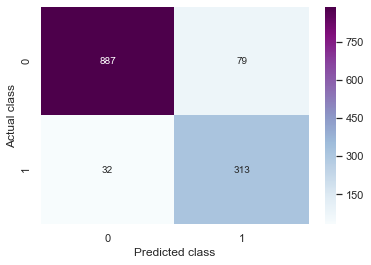

In [42]:
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt='d', cmap='BuPu')
plt.ylabel('Actual class')
plt.xlabel('Predicted class')

### Vykresleny rozhodovaci strom s kriteriom gini

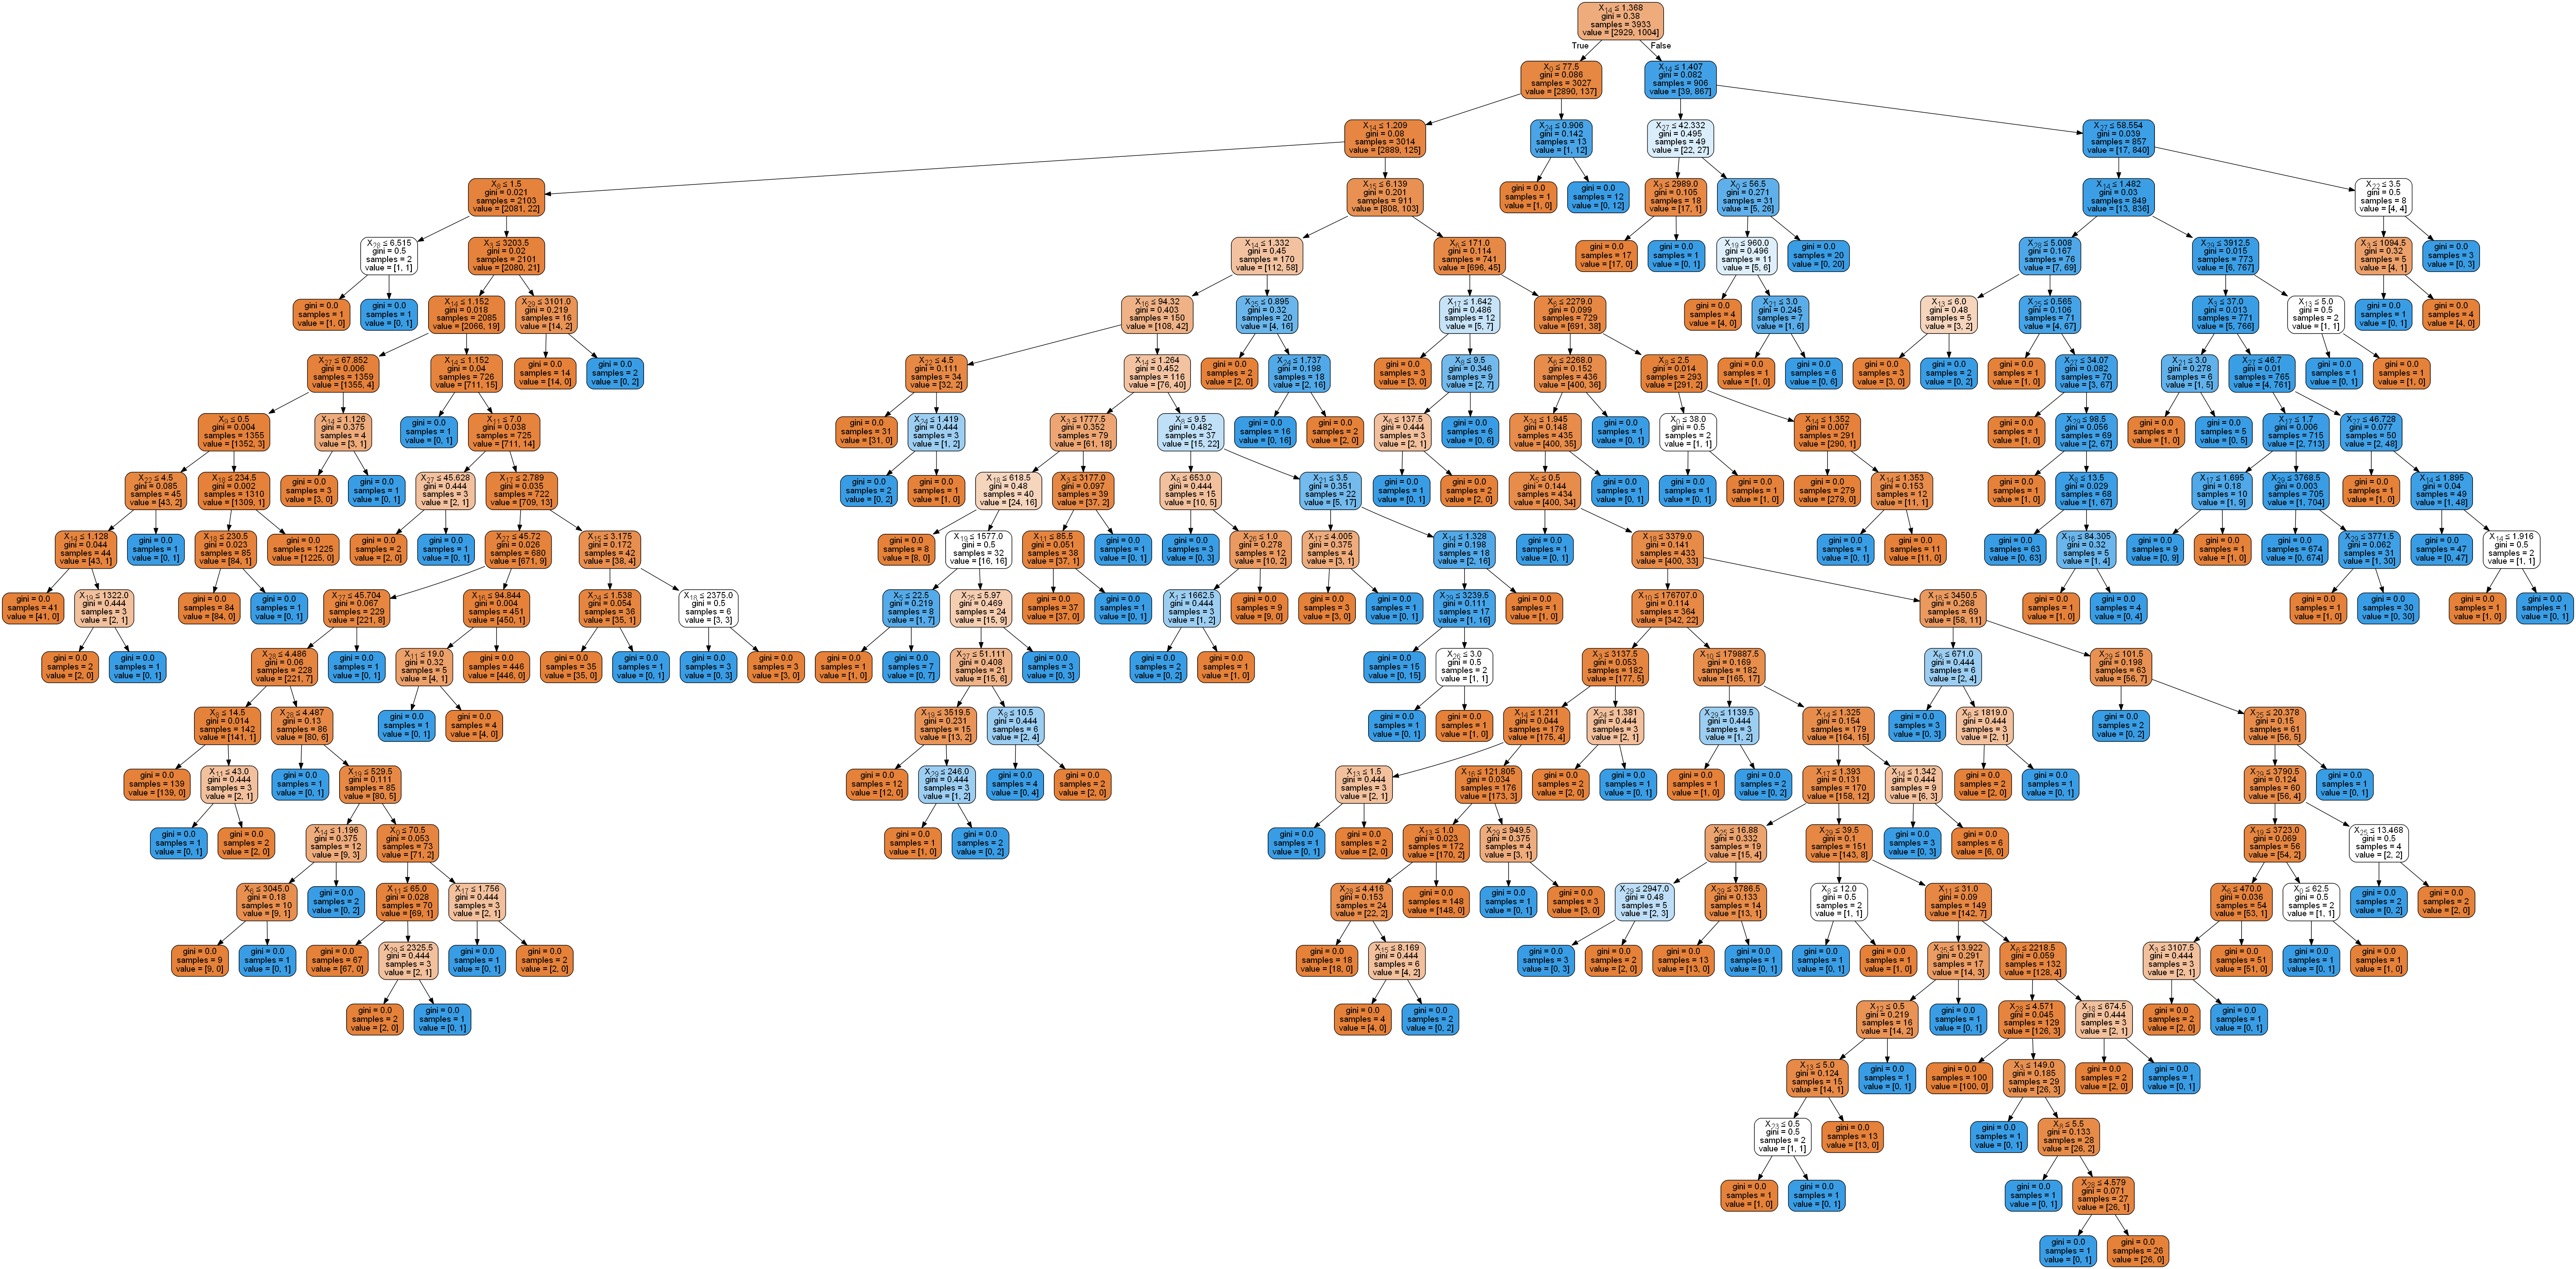

In [43]:
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

<ul>
    <li>Vypiseme si atributy podla dolezitosti</li>
    <li>Ako vidime najdolezitejsim atributom je kurtosis_glocse, potom nasleduje std_glucose, kurtosis_oxygen.</li>
    <li>Na stvrtom mieste sa nachadza age, dalej street, date_of_birth, skewness oxygen, city, name a na desiatom mieste sa nachadza education_num</li>
    <li>Vidime, ze hodnota pri kurtosis_glucose je vyrazne vacsia ako nasledujuce hodnoty, takze kurtosis_glucose je hlavnym predikatorom cukrovky</li>
</ul>

In [45]:
importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]): 
    print('%d. feature %s (%f)' % (f + 1, X_train.columns[indices[f]], importances[indices[f]]))

1. feature kurtosis_glucose (0.819417)
2. feature std_glucose (0.018737)
3. feature kurtosis_oxygen (0.017862)
4. feature age (0.017145)
5. feature street (0.016521)
6. feature date_of_birth (0.013834)
7. feature skewness_oxygen (0.009725)
8. feature city (0.009659)
9. feature name (0.009395)
10. feature education-num (0.009121)
11. feature postal_code (0.008106)
12. feature skewness_glucose (0.007829)
13. feature std_oxygen (0.006246)
14. feature mean_oxygen (0.005963)
15. feature hours-per-week (0.004518)
16. feature mean_glucose (0.004508)
17. feature relationship (0.004480)
18. feature race (0.004048)
19. feature job (0.003937)
20. feature country (0.002309)
21. feature status (0.002006)
22. feature fnlwgt (0.001870)
23. feature income (0.001092)
24. feature capital-gain (0.000892)
25. feature sex (0.000669)
26. feature employment (0.000111)
27. feature education (0.000000)
28. feature city_was_nan (0.000000)
29. feature pregnant (0.000000)
30. feature capital-loss (0.000000)


### CART s kriteriom entropy
<ul>
    <li>kriterium entropy predstavuje hodnotu cistoty mnoziny vzoriek</li>
</ul>

In [46]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=new_train.count(axis=1)[0])
tree = tree.fit(X=X_train, y=y_train)
predict = tree.predict(X=X_test)

### Vyhodnotenie klasifikatora CART s kriteriom entropy

In [47]:
print(classification_report(y_test, predict, digits=3))

              precision    recall  f1-score   support

           0      0.967     0.935     0.951       966
           1      0.833     0.910     0.870       345

    accuracy                          0.928      1311
   macro avg      0.900     0.922     0.910      1311
weighted avg      0.932     0.928     0.929      1311



<ul>
    <li>Hodnota accuracy je 92,8%, precision je 90,0%, recall je 92,2% a f1-score je 91,0%</li>
</ul>

Text(0.5, 12.5, 'Predicted class')

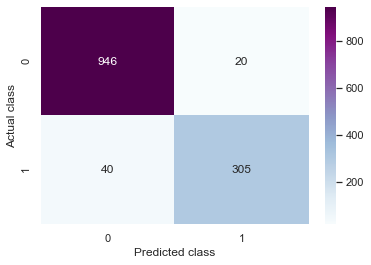

In [119]:
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt='d', cmap='BuPu')
plt.ylabel('Actual class')
plt.xlabel('Predicted class')

### Vykresleny rozhodovaci strom s kriteriom entropy

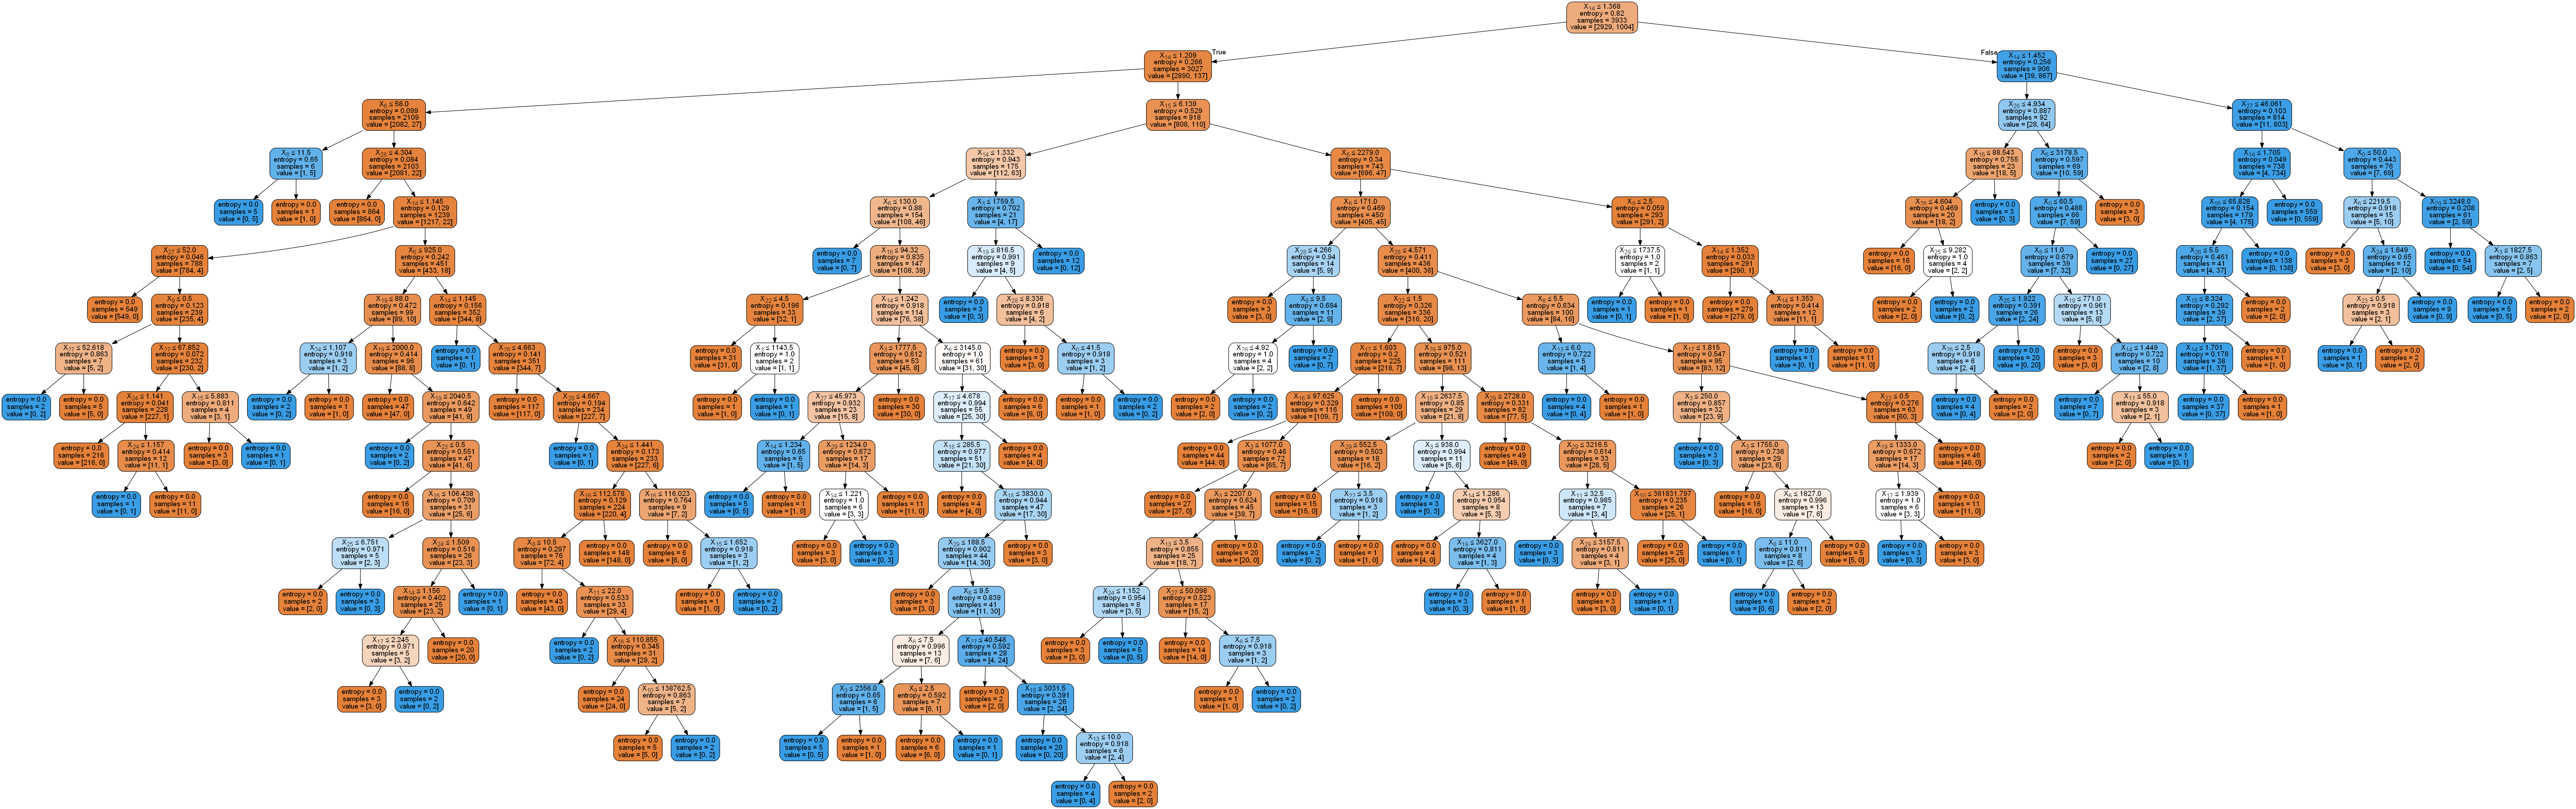

In [49]:
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

### Vyhodnotenie rozhodovacich stromov

<ul>
    <li>Hodnota accuracy, precision, recall aj f-1 score je pri rozhodovacom strome s kriteriom gini vacsia ako s kriteriom entropy</li>
    <li>Oba rozhodovacie stromy, aj s kriteriom gini aj entropy dosahovali pri maximalnej hlbke rovnajucej sa poctu atributov horsie vysledky ako nase manualne definovane pravidla</li>
    <li>Rozhodovaci strom s kriteriom gini dosahoval accuracy 91,5% pricom nase manualne definovane pravidla zahrnajuce kombinaciu atributov kurtosis_glucose a skewness_glucose, a jeden atribut skewness_glucose dosahoval az 93%</li>
</ul>

## Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(max_depth=new_train.count(axis=1)[0])
forest = forest.fit(X=X_train, y=y_train)
predict = forest.predict(X=X_test)

C:\Users\Danie\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### Vyhodnotenie klasifikatora Random Forest

In [51]:
print(classification_report(y_test, predict, digits=3))

              precision    recall  f1-score   support

           0      0.975     0.980     0.978       966
           1      0.944     0.930     0.937       345

    accuracy                          0.967      1311
   macro avg      0.960     0.955     0.958      1311
weighted avg      0.967     0.967     0.967      1311



<ul>
    <li>Hodnota accuracy pri random foreste je 96,7%, precision je 96,0%, recall je 95,5% a f1-score je 95,8%.</li>
</ul>

Text(0.5, 12.5, 'Predicted class')

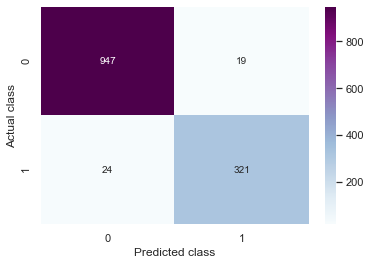

In [52]:
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt='d', cmap='BuPu')
plt.ylabel('Actual class')
plt.xlabel('Predicted class')

<ul>
    <li>Ako vidime Random forest dosahuje lepsie vysledky. Hodnoty accuracy, precision, recall aj f-1 score su vacsie ako pri jednom rozhodovacom strome</li>
    <li>Random forest dosahuje lepsie vysledky aj ako nase manualne definovane pravidla</li>
</ul>

## Optimalizacia hyperparametrov
<ul>
    <li>Budeme optimalizovat hyperparametre rozhodovacieho stromu</li>
    <li>Najprv si vypiseme parametre</li>
</ul>

In [53]:
tree = DecisionTreeClassifier()
tree.get_params()

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

<ul>
    <li>Pouzijeme GridSearch a nastavime si jednotlive parametre, ktore chceme skusat</li>
    <li>max_depth, nam urcuje maximalnu hlbku stromu cize najvacsia vzdialenost od korena stromu k listu stromu, nastavili sme pre nu hodnotu 31(pocet atributov), 4, 3, 2 a 8</li>
    <li>criterion nam hovori na zaklade coho sa bude strom rozvetvovat, nastavili sme hodnoty gini, ta predstavuje pravdepodobnost ze vzorka bude nespravne klasifikovana a hodnotu entropy, ktora predstavuje hodnotu cistoty mnoziny vzoriek</li>
    <li>max_features predstavuje maximalny pocet atributov na ktorych sa strom trenuje, nastavili sme hodnoty 10, 5, 30, 8</li>
    <li>min_samples_leaf predstavuje minimalny pocet vzoriek, ktore musia byt na liste, nastavili sme hodnoty 1, 3</li>
    <li>scoring nastavime na accuracy, cv 10, kedze robime 10 nasobnu krizovu validaciu a n_jobs -1, pretoze netrenujeme paralelne</li>
</ul>

In [62]:
from sklearn.model_selection import GridSearchCV
params_tree = {'max_depth': [31, 4, 2, 3, 8], 'criterion': ['gini', 'entropy'], 'max_features': [10, 5, 30, 8], 'min_samples_leaf': [1, 3]}
grid_tree = GridSearchCV(estimator=tree, param_grid=params_tree, scoring='accuracy', cv=10, n_jobs=-1)
grid_tree.fit(X=X_train, y=y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [31, 4, 2, 3, 8],
                      

<ul>
    <li>Vypiseme si najlepsie hyperparametre</li>
    <li>Strom dosahuje najvacsiu hodnotu accuracy s hyperparametrami: criterion - gini, max_depth - 3, max_features - 30 a min_sample_leaf - 3</li>
</ul>

In [63]:
best = grid_tree.best_params_
best

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 30,
 'min_samples_leaf': 3}

<ul>
    <li>Hodnota accuracy je 95,83% co je viac ako sme mali pri rozhodovacom strome a viac ako pri nasich manualne vytvorenych pravidlach avsak Random Forest je stale uspesnejsi</li>
</ul>

In [64]:
best_cv = grid_tree.best_score_
best_cv

0.9583015509788965

## Vyhodnotenie vplyvu zvolenej strategie riesenia chybajucich hodnot

<ul>
    <li>Kedze v zozname najdolezitejsich atributov sa na prvych prieckach vyskytovali numericke atributy, tak sme vyskusali inu strategiu pri doplnani numerickych hodnot</li>
    <li>V predspracovani sme vyskusali pri numerickych atributoch doplnat chybajuce hodnoty namiesto medianu priemerom</li>
    <li>Vyskusali sme to na rozhodovacom strome s hyperparametrami, ktore nam v optimalizacii vysli ako najlepsie</li>
</ul>

In [65]:
import my_preprocessing_2

In [66]:
personal_train = pd.read_csv('personal_train.csv')
other_train = pd.read_csv('other_train.csv')

In [67]:
my_merger = my_preprocessing_2.MyMerger()

my_tidy_personal = my_preprocessing_2.MyTidy()
my_imputer_personal = my_preprocessing_2.MyImputer()
my_normalizator_personal = my_preprocessing_2.MyNormalizator()

my_tidy_other = my_preprocessing_2.MyTidy()
my_imputer_other = my_preprocessing_2.MyImputer()
my_normalizator_other = my_preprocessing_2.MyNormalizator()

In [68]:
personal_train = my_tidy_personal.tidy_personal(personal_train.copy())
personal_train = my_imputer_personal.fit_transform(personal_train.copy())
personal_train = my_normalizator_personal.normalize(personal_train.copy())

other_train = my_tidy_other.tidy_other(other_train.copy())
other_train = my_imputer_other.fit_transform(other_train.copy())
other_train = my_normalizator_other.normalize(other_train.copy())

new_train = my_merger.merge(personal_train.copy(), other_train.copy())

C:\Users\Danie\Desktop\iau\projekt\my_preprocessing_2.py:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[column_name[i]][mask] = self.value[k]
C:\Users\Danie\Desktop\iau\projekt\my_preprocessing_2.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[column_name[i]][mask] = self.value[k]
C:\Users\Danie\Desktop\iau\projekt\my_preprocessing_2.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[column_name[i]][mask] = self.value[k]
C:\Users\Danie\Desktop\iau\projekt\my_prepr

In [69]:
new_train = convert(new_train.copy())

In [70]:
X_train = new_train[new_train.columns.difference(['class'])]
y_train = new_train['class']

In [74]:
personal_valid = pd.read_csv('personal_valid.csv')
other_valid = pd.read_csv('other_valid.csv')

In [75]:
personal_valid = my_tidy_personal.tidy_personal(personal_valid.copy())
personal_valid = my_imputer_personal.transform(personal_valid.copy())
personal_valid = my_normalizator_personal.normalize(personal_valid.copy())

other_valid = my_tidy_other.tidy_other(other_valid.copy())
other_valid = my_imputer_other.transform(other_valid.copy())
other_valid = my_normalizator_other.normalize(other_valid.copy())

new_valid = my_merger.merge(personal_valid.copy(), other_valid.copy())

In [76]:
new_valid = convert(new_valid.copy())

In [77]:
X_test = new_valid[new_valid.columns.difference(['class'])]
y_test = new_valid['class']

In [78]:
tree = DecisionTreeClassifier(criterion='gini', max_depth=3, max_features=30, min_samples_leaf=3)
tree = tree.fit(X=X_train, y=y_train)
predict = tree.predict(X=X_test)

In [79]:
print(classification_report(y_test, predict, digits=3))

              precision    recall  f1-score   support

           0      0.966     0.986     0.976       966
           1      0.957     0.904     0.930       345

    accuracy                          0.964      1311
   macro avg      0.962     0.945     0.953      1311
weighted avg      0.964     0.964     0.964      1311



<ul>
    <li>Pri doplnani chybajucich numerickych hodnot priemerom nam hodnota accuracy vysla 96,4%, precision 96,2%, recall je 94,5% a f-1 score ma hodnotu 95,3%</li>
</ul>

Text(0.5, 12.5, 'Predicted class')

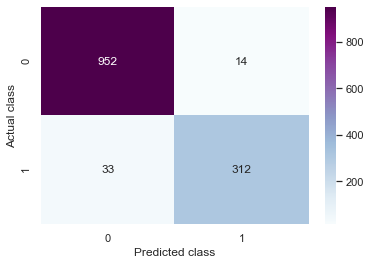

In [80]:
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt='d', cmap='BuPu')
plt.ylabel('Actual class')
plt.xlabel('Predicted class')

In [81]:
personal_train = pd.read_csv('personal_train.csv')
other_train = pd.read_csv('other_train.csv')

In [82]:
my_merger = my_preprocessing.MyMerger()

my_tidy_personal = my_preprocessing.MyTidy()
my_imputer_personal = my_preprocessing.MyImputer()
my_normalizator_personal = my_preprocessing.MyNormalizator()

my_tidy_other = my_preprocessing.MyTidy()
my_imputer_other = my_preprocessing.MyImputer()
my_normalizator_other = my_preprocessing.MyNormalizator()

In [83]:
personal_train = my_tidy_personal.tidy_personal(personal_train.copy())
personal_train = my_imputer_personal.fit_transform(personal_train.copy())
personal_train = my_normalizator_personal.normalize(personal_train.copy())

other_train = my_tidy_other.tidy_other(other_train.copy())
other_train = my_imputer_other.fit_transform(other_train.copy())
other_train = my_normalizator_other.normalize(other_train.copy())

new_train = my_merger.merge(personal_train.copy(), other_train.copy())

C:\Users\Danie\Desktop\iau\projekt\my_preprocessing.py:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[column_name[i]][mask] = self.value[k]
C:\Users\Danie\Desktop\iau\projekt\my_preprocessing.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[column_name[i]][mask] = self.value[k]
C:\Users\Danie\Desktop\iau\projekt\my_preprocessing.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[column_name[i]][mask] = self.value[k]
C:\Users\Danie\Desktop\iau\projekt\my_preprocessi

In [84]:
new_train = convert(new_train.copy())

In [85]:
X_train = new_train[new_train.columns.difference(['class'])]
y_train = new_train['class']

In [86]:
personal_valid = pd.read_csv('personal_valid.csv')
other_valid = pd.read_csv('other_valid.csv')

In [87]:
personal_valid = my_tidy_personal.tidy_personal(personal_valid.copy())
personal_valid = my_imputer_personal.transform(personal_valid.copy())
personal_valid = my_normalizator_personal.normalize(personal_valid.copy())

other_valid = my_tidy_other.tidy_other(other_valid.copy())
other_valid = my_imputer_other.transform(other_valid.copy())
other_valid = my_normalizator_other.normalize(other_valid.copy())

new_valid = my_merger.merge(personal_valid.copy(), other_valid.copy())

In [88]:
new_valid = convert(new_valid.copy())

In [89]:
X_test = new_valid[new_valid.columns.difference(['class'])]
y_test = new_valid['class']

In [90]:
tree = DecisionTreeClassifier(criterion='gini', max_depth=3, max_features=30, min_samples_leaf=3)
tree = tree.fit(X=X_train, y=y_train)
predict = tree.predict(X=X_test)

In [91]:
print(classification_report(y_test, predict, digits=3))

              precision    recall  f1-score   support

           0      0.959     0.979     0.969       966
           1      0.938     0.884     0.910       345

    accuracy                          0.954      1311
   macro avg      0.949     0.932     0.940      1311
weighted avg      0.954     0.954     0.954      1311



<ul>
    <li>Pri povodnom nahradzani numerickych hodnot medianom sme dostali accuracy 95,4%, precsion 94,9%, recall 93,2% a f-1 score 94%.</li>
</ul>

Text(0.5, 12.5, 'Predicted class')

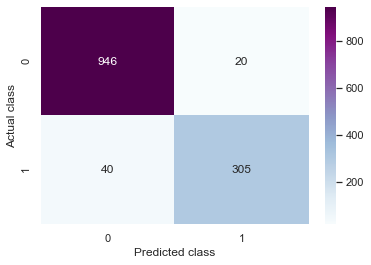

In [92]:
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt='d', cmap='BuPu')
plt.ylabel('Actual class')
plt.xlabel('Predicted class')

<ul>
    <li>Po porovnani modelov s odlisnym principom doplnania numerickych hodnot vidime ze strategia nahradzania hodnot s priemerom sa ukazala byt ako uspesnejsia. Hodnotu accuracy dosahuje az 96,4% pricom doplnanie medianom iba 95,4%. </li>
    <li>Znamena to, ze nasa prvotne zvolena stategia nebola az taka idealna :(( </li>
   <li>Kategoricke hodnoty sme neriesili pretoze nemaju vyrazny vplyv na klasifikaciu. </li>
</ul>